## DATA IMPORT AND IMPORT CHECKING

In [285]:
#!git clone https://github.com/akhilmuraliai/Self-Driving-Car-behavioural-cloning

In [286]:
# !ls autonomous_driving_udemy/behavioural-cloning/

In [287]:
# !pip install imgaug

## NOTEBOOK IMPORTS

In [288]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.image as mpimg

import cv2
import random
import os
import ntpath

import warnings
warnings.filterwarnings('ignore')

from imgaug import augmenters as iaa

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

## DATA PREPROCESSING

In [289]:
datadir = 'autonomous_driving_udemy/behavioural-cloning'

columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head(10)

center  ...     speed
0  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_51_497.jpg  ...  0.000078
1  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_51_597.jpg  ...  0.000080
2  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_51_700.jpg  ...  0.000078
3  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_51_804.jpg  ...  0.000078
4  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_51_906.jpg  ...  0.000078
5  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_52_007.jpg  ...  0.000081
6  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_52_113.jpg  ...  0.000080
7  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_52_217.jpg  ...  0.000079
8  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_52_317.jpg  ...  0.000079
9  F:\archangel\Autonomous Driving Udemy\autonomous_driving_udemy\behavioural-cloning\IMG\center_2020_07_27_09_57_52_419.jpg  ...  0.220430

[10 rows x 7 columns]

### DATA PATH RETRIEVAL

In [290]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [291]:
data.head()

center  ...     speed
0  center_2020_07_27_09_57_51_497.jpg  ...  0.000078
1  center_2020_07_27_09_57_51_597.jpg  ...  0.000080
2  center_2020_07_27_09_57_51_700.jpg  ...  0.000078
3  center_2020_07_27_09_57_51_804.jpg  ...  0.000078
4  center_2020_07_27_09_57_51_906.jpg  ...  0.000078

[5 rows x 7 columns]

In [292]:
data.shape

(4022, 7)

### HISTOGRAM OF STEER ANGLES

<BarContainer object of 25 artists>

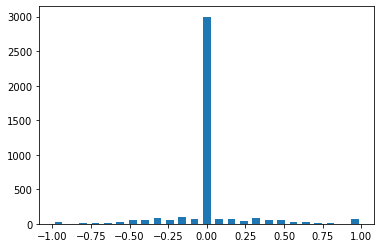

In [293]:
num_bins = 25
hist, bins = np.histogram(data['steering'], num_bins)\

# Performing 2 segments element wise addition
center = (bins[:-1] + bins[1:]) * 0.5


plt.bar(center, hist, width=0.05)

In [294]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

    As we can see there is clearly data imbalance
    To solve this we provide a cutoff 

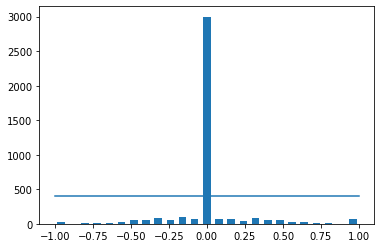

In [295]:
num_bins = 25
samples_per_bin = 400  # cutoff point or 200

hist, bins = np.histogram(data['steering'], num_bins)

center = (bins[:-1] + bins[1:]) * 0.5

plt.bar(center, hist, width=0.05)

plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

    Now we have some data balanced
    This is essesntial to capture more zero steer angles 
    which correspond to center lane driving

total data: 4022
Removed:  2599
Remaining:  1423


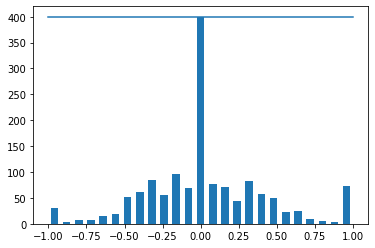

In [296]:
print('total data:', len(data))

remove_list = []

for j in range(num_bins):
    list_ = []

    for i in range(len(data['steering'])):
        # Isolate current bin which we're iterating
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)

    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('Removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('Remaining: ', len(data))

hist, _ = np.histogram(data['steering'], num_bins)

plt.bar(center, hist, width=0.05)

plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

# print('total data:', len(data))
# remove_list = []
# for j in range(num_bins):
#   list_ = []
#   for i in range(len(data['steering'])):
#     if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
#       list_.append(i)
#   list_ = shuffle(list_)
#   list_ = list_[samples_per_bin:]
#   remove_list.extend(list_)
 
# print('removed:', len(remove_list))
# data.drop(data.index[remove_list], inplace=True)
# print('remaining:', len(data))

# hist, _ = np.histogram(data['steering'], (num_bins))
# plt.bar(center, hist, width=0.05)
# plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

## TRAIN AND VALIDATION SPLIT

In [297]:
# def load_img_steering(datadir, df):
#     image_path = []
#     steering = []

#     for i in range(len(data)):
#         indexed_data = data.iloc[i]
#         center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
#         image_path.append(os.path.join(datadir, center.strip()))
#         steering.append(float(indexed_data[3]))

#     image_paths = np.asarray(image_path)
#     steerings = np.asarray(steering)

#     return image_paths, steerings

# image_paths, steerings = load_img_steering(datadir + 'IMG/', data)
print(data.iloc[1])

def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):

    indexed_data = data.iloc[i]

    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    
    # center image append
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)

    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)

    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2020_07_27_09_57_52_931.jpg
left        left_2020_07_27_09_57_52_931.jpg  
right       right_2020_07_27_09_57_52_931.jpg 
steering   -0.332306                          
throttle    1                                 
reverse     0                                 
speed       5.3857                            
Name: 14, dtype: object


In [298]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

print('Train Samples: ', len(X_train))
print('Valid Samples: ', len(X_valid))

Train Samples:  3415
Valid Samples:  854


Text(0.5, 1.0, 'Validation Set')

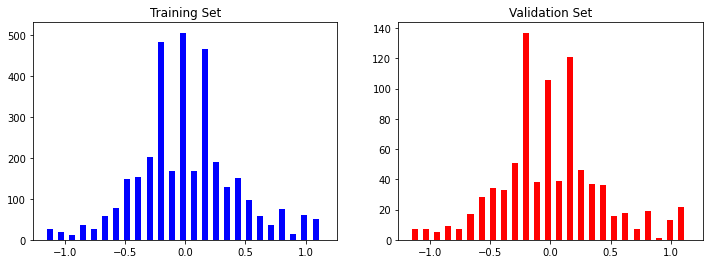

In [299]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
ax[0].set_title('Training Set')

ax[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
ax[1].set_title('Validation Set')

## PREPROCESSING IMAGES

#### ZOOMING IMAGES

In [300]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

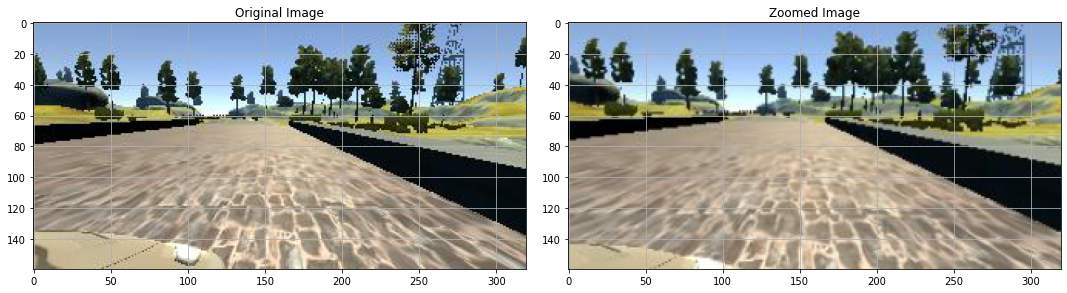

In [301]:
image = image_paths[np.random.randint(0, 600)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].grid()
ax[1].imshow(zoomed_image)
ax[1].set_title("Zoomed Image")
ax[1].grid()

In [302]:
def pan(image):
    pan = iaa.Affine(translate_percent= {'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

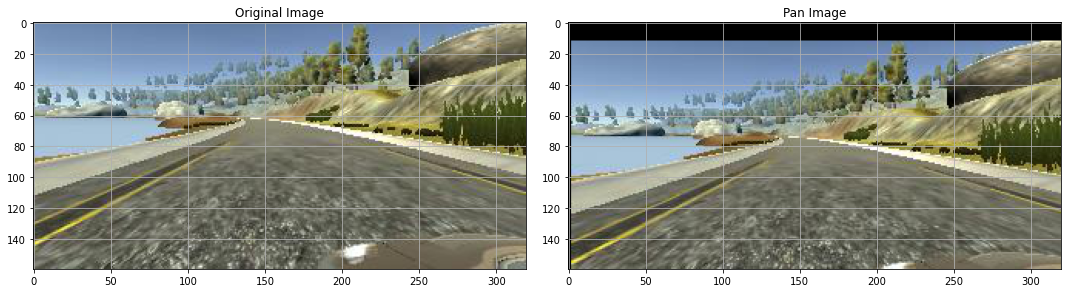

In [303]:
image = image_paths[np.random.randint(0, 600)]
original_image = mpimg.imread(image)
pan_image = pan(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].grid()
ax[1].imshow(pan_image)
ax[1].set_title("Pan Image")
ax[1].grid()

In [304]:
def img_random_brightness(image):
    bright = iaa.Multiply((0.2, 1.2))
    image = bright.augment_image(image)
    return image

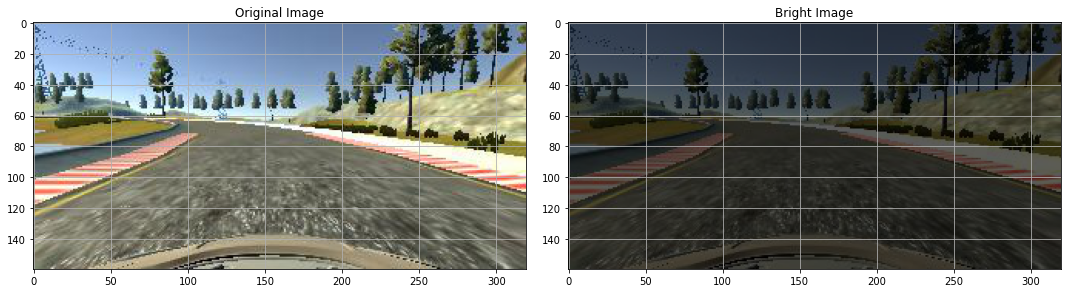

In [305]:
image = image_paths[np.random.randint(0, 600)]
original_image = mpimg.imread(image)
bright_image = img_random_brightness(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].grid()
ax[1].imshow(bright_image)
ax[1].set_title("Bright Image")
ax[1].grid()

In [306]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

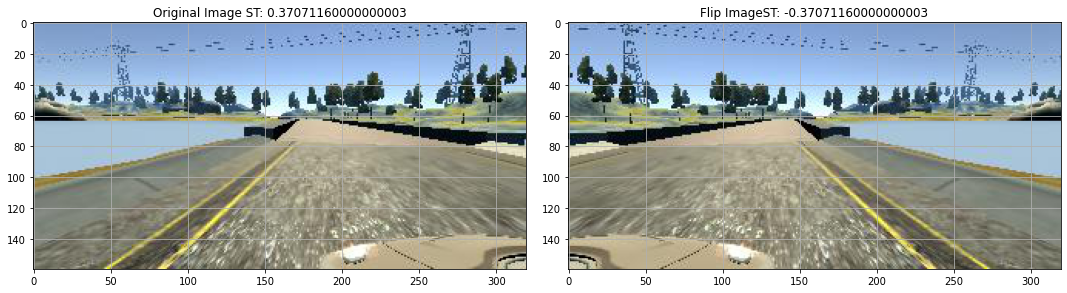

In [307]:
random = np.random.randint(0, 600)

image = image_paths[random]
steering_angle = steerings[random]

original_image = mpimg.imread(image)
flip_image, flip_st_angle = img_random_flip(original_image, steering_angle)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title("Original Image " + 'ST: ' + str(steering_angle))
ax[0].grid()
ax[1].imshow(flip_image)
ax[1].set_title("Flip Image" + 'ST: ' + str(flip_st_angle))
ax[1].grid()

In [308]:
# we do not want each augmentation to apply to each image generated
# applying all augmentation to every generated image actually reduces the overall variety of dataset
# combining the augmentations at rndom results in added variety improved generalization of model

# each augmentation only apply augmentation to 50%
def random_augment(image, steering_angle):
    image = mpimg.imread(image)

    if np.random.randn() < 0.5:
        image = pan(image)

    if np.random.randn() < 0.5:
        image = zoom(image)

    if np.random.randn() < 0.5:
        image = img_random_brightness(image)

    if np.random.randn() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

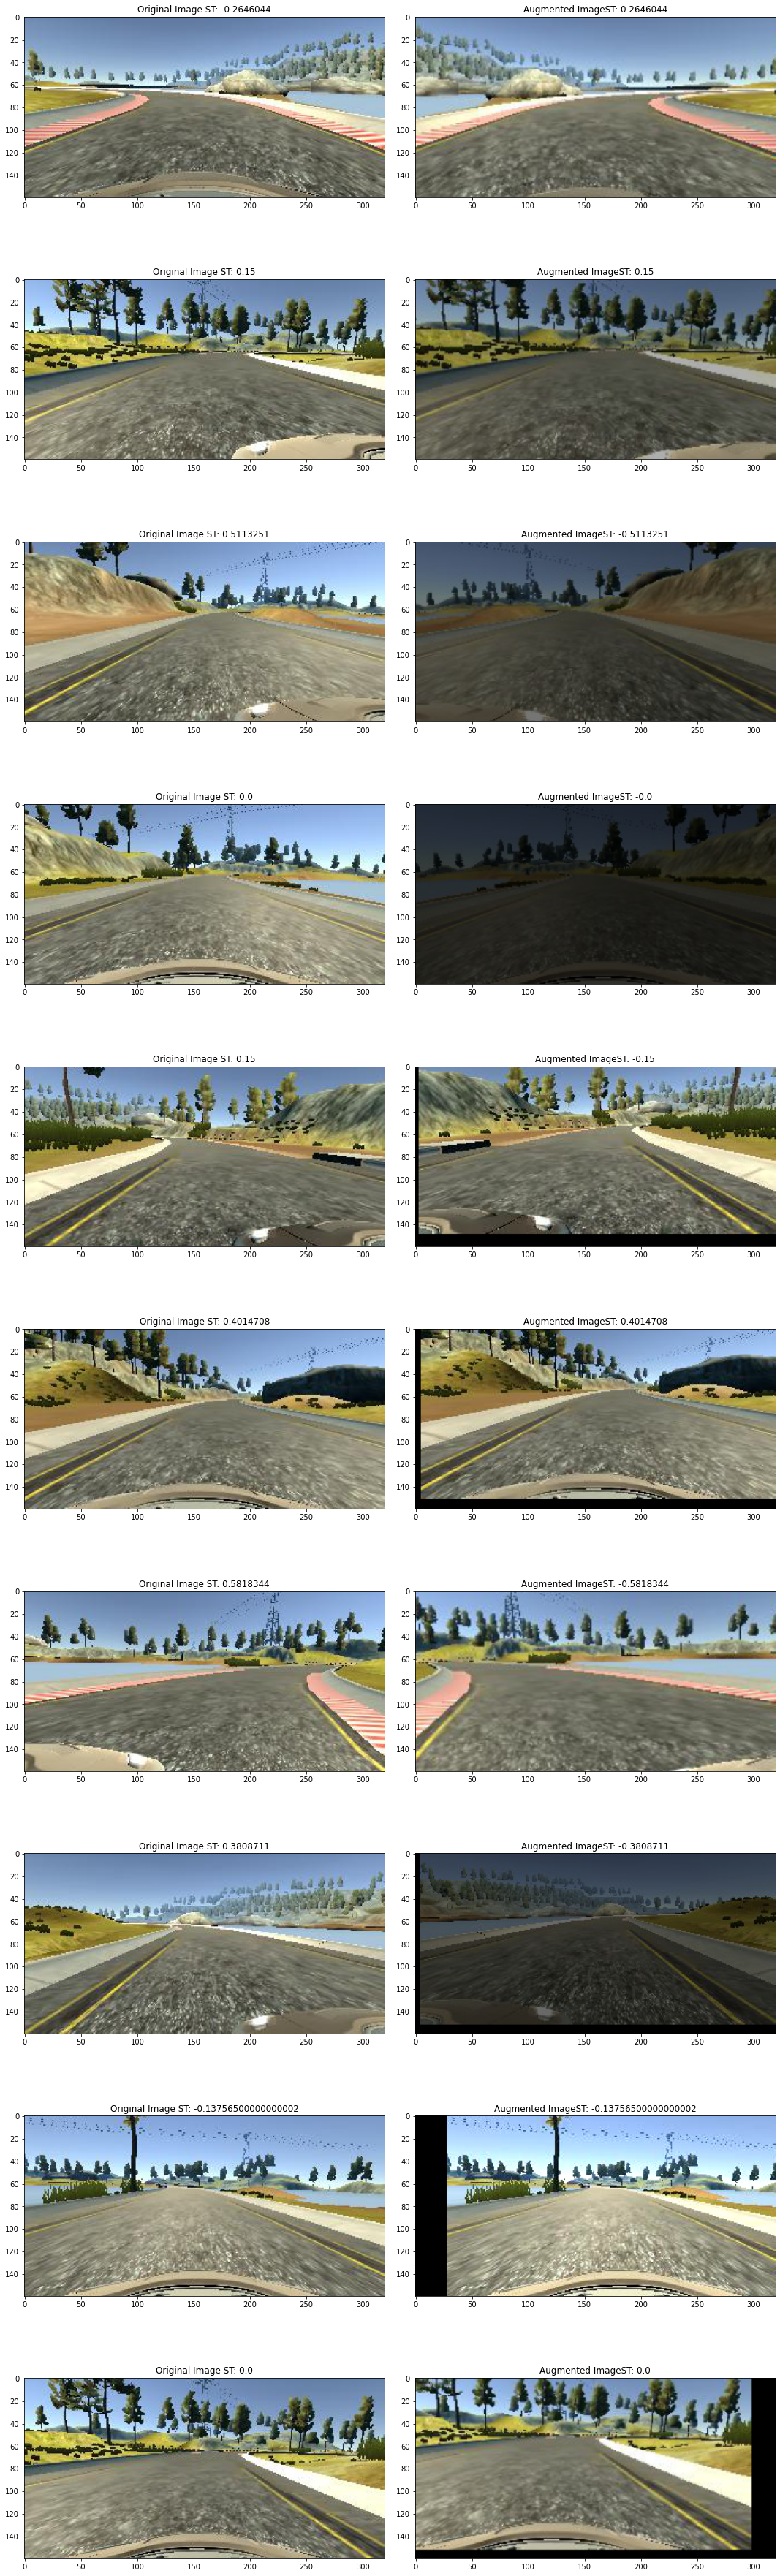

In [309]:
ncols = 2
nrows = 10

fig, ax = plt.subplots(nrows, ncols, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    r = np.random.randint(0, len(image_paths) - 1)

    random_img = image_paths[r]
    random_steer = steerings[r]

    or_img = mpimg.imread(random_img)
    aug_img, steer = random_augment(random_img, random_steer)

    ax[i][0].imshow(or_img)
    ax[i][0].set_title('Original Image ' + 'ST: ' + str(random_steer) )

    ax[i][1].imshow(aug_img)
    ax[i][1].set_title('Augmented Image' + 'ST: ' + str(steer))

In [310]:
def img_preprocess(img):

    # we are croping th image as to shift the focus of the CNN to focus on the road
    # to achieve this, we slice the height but intacting the other dimension
    img = img[60:135, :, :]

    # we are using Nvidia Model for this purpose
    # so that architecture wants it in YUV format
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # blurring
    img = cv2.GaussianBlur(img, (3,3), 0)

    # resize (not necessary) only for faster computation
    # and also, nvidia model expects in this size
    img = cv2.resize(img, (200, 66))

    # normalization
    img = img/255

    return img

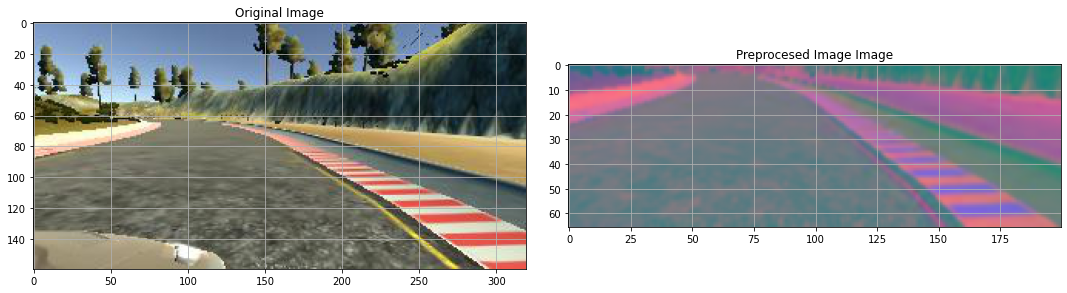

In [311]:
image = image_paths[47]

original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].grid()
ax[1].imshow(preprocessed_image)
ax[1].set_title("Preprocesed Image Image")
ax[1].grid()

## DATA BATCH GENERATOR

In [312]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            r_idx = np.random.randint(0, len(image_paths)-1)

            if istraining:
                im, steering = random_augment(image_paths[r_idx], steering_ang[r_idx])
            else: # validation data, no need to be augmented
                im = mpimg.imread(image_paths[r_idx])
                steering = steering_ang[r_idx]

            im = img_preprocess(im)

            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))


Text(0.5, 1.0, 'Validation Image')

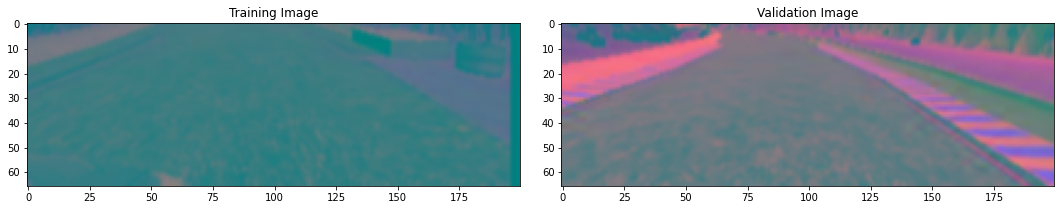

In [313]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [314]:
# X_train = np.array(list(map(img_preprocess, X_train)))
# X_valid = np.array(list(map(img_preprocess, X_valid)))

# plt.imshow(X_train[np.random.randint(0, len(X_train)-1)])
# plt.axis('off')
# plt.grid()
# print('Shape: ', X_train.shape)
# plt.show()

## MODEL BUILDING

In [324]:
# Model used for behavioural cloning - Nvidia Model
# We are dealing with a regression type problem, returns a steering angle from learning through images

# We replace relu with elu, to avoid the dying of node
# gradient of negative region is zero, as relu
# that is when a node gets a negative number it'll return a zero value
# that is no learning, due to retuning of zero, then loss of model remain stagnant and never decrease
# so we use elu, it has a non zero gradient in negative region
# therefore it is always capable of learning and contributing to model


def nvidia_model():

    model = Sequential()
    
    model.add(Conv2D(filters=24, kernel_size=(5,5), strides=(2,2), activation='elu', input_shape=(66, 200, 3)))
    model.add(Conv2D(filters=36, kernel_size=(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(filters=48, kernel_size=(5,5), strides=(2,2), activation='elu'))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='elu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='elu'))

    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(100, activation='elu'))
    # model.add(Dropout(0.5))
    model.add(Dense(50, activation='elu'))
    # model.add(Dropout(0.5))
    model.add(Dense(10, activation='elu'))
    # model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model

In [325]:
model = nvidia_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

## TRAINING MODEL

In [326]:
# we augment 100 images, 300 times, that is 30k images per epoch

h = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                        steps_per_epoch=300,
                        epochs=10,
                        validation_data=batch_generator(X_valid, y_valid, 100, 0),
                        validation_steps=200, verbose=1, shuffle=True)

Epoch 1/10
300/300 [==============================] - 226s 752ms/step - loss: 0.1874 - val_loss: 0.1338
Epoch 2/10
300/300 [==============================] - 215s 717ms/step - loss: 0.1483 - val_loss: 0.1193
Epoch 3/10
300/300 [==============================] - 216s 719ms/step - loss: 0.1256 - val_loss: 0.0895
Epoch 4/10
300/300 [==============================] - 210s 699ms/step - loss: 0.1007 - val_loss: 0.0730
Epoch 5/10
300/300 [==============================] - 205s 685ms/step - loss: 0.0911 - val_loss: 0.0556
Epoch 6/10
300/300 [==============================] - 205s 684ms/step - loss: 0.0829 - val_loss: 0.0607
Epoch 7/10
300/300 [==============================] - 205s 683ms/step - loss: 0.0805 - val_loss: 0.0642
Epoch 8/10
300/300 [==============================] - 204s 681ms/step - loss: 0.0753 - val_loss: 0.0628
Epoch 9/10
300/300 [==============================] - 205s 683ms/step - loss: 0.0722 - val_loss: 0.0666
Epoch 10/10
300/300 [==============================] - 205s 683m

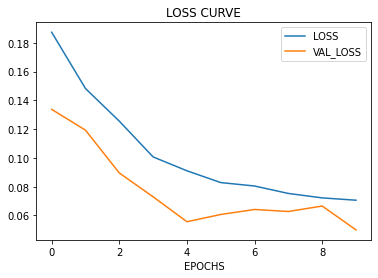

In [327]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['LOSS', 'VAL_LOSS'])
plt.title("LOSS CURVE")
plt.xlabel('EPOCHS')
plt.show()
 
# however there is a small overfitting at the end
# val_loss is above train_loss
# to avoid this we add more dropuout

## SAVING MODEL

In [329]:
model.save('mymodel.h5')

In [330]:
from google.colab import files
files.download('mymodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>